# Analytical derivation of the prior XSwap probability of a hetnet edge

+ Lizee prior proposed [here](https://think-lab.github.io/d/194/#2) with further discussion [here](https://think-lab.github.io/d/201/#2).
+ Chung-Lu and Kloster priors proposed [here](https://github.com/greenelab/hetmech/issues/134#issuecomment-419133600).

Created an environment for this notebook with:

```
conda create --name=r --channel=conda-forge \
  r-base r-dplyr r-ggplot2 r-readr r-irkernel r-boot r-rcurl r-tidyr
```

In [1]:
# Load magrittr pipe
`%>%` = dplyr::`%>%`

## Read in XSwap prior probabilities

In [2]:
process_metaedge_degree_df <- function(df) {
  df %>%
  dplyr::mutate(logit_xswap_prior = boot::logit(xswap_prior)) %>%
  dplyr::mutate(Lizee = source_degree * target_degree / sum(n_possible)) %>%
  dplyr::mutate(`Chung-Lu` = source_degree * target_degree / sum(n_edges)) %>%
  dplyr::mutate(Kloster = source_degree * target_degree /
    (sum(n_edges) + (source_degree - 1) * (target_degree - 1)))
}

In [3]:
# Compound-treats-Disease
url = 
CtD_df = 'https://github.com/dhimmel/learn/raw/0aae784e83cfaa00d1269f17a3bd3a6c6fdc3a0a/prior/data/degree-prior.tsv' %>%
  readr::read_tsv() %>%
  dplyr::mutate(metaedge='CtD') %>%
  dplyr::rename(source_degree=compound_treats, target_degree=disease_treats, xswap_prior=prior_perm, n_edges=n_treatments) %>%
  process_metaedge_degree_df()
CtD_df %>% head(2)

`curl` package not installed, falling back to using `url()`
Parsed with column specification:
cols(
  compound_treats = col_integer(),
  disease_treats = col_integer(),
  prior_perm = col_double(),
  prior_perm_stderr = col_double(),
  n_treatments = col_integer(),
  n_possible = col_integer()
)


source_degree,target_degree,xswap_prior,prior_perm_stderr,n_edges,n_possible,metaedge,logit_xswap_prior,Lizee,Chung-Lu,Kloster
1,1,0.00116183,5.44733e-07,5,3612,CtD,-6.756596,3.355817e-05,0.001324503,0.001324503
1,2,0.00234128,1.29275e-06,3,1290,CtD,-6.054713,6.711635e-05,0.002649007,0.002649007


In [4]:
# Disease-associates-Gene
# see https://github.com/greenelab/snorkeling/pull/67
GaD_df = 'https://github.com/greenelab/snorkeling/raw/6f9202a6874c64fedeb97489cc6560447b6e9424/disease_gene/disease_associates_gene/degree-prior.csv' %>%
  readr::read_csv() %>%
  dplyr::mutate(metaedge='GaD') %>%
  dplyr::rename(source_degree=disease_associates, target_degree=gene_associates, xswap_prior=prior_perm, n_edges=n_associations) %>%
  process_metaedge_degree_df()
GaD_df %>% head(2)

`curl` package not installed, falling back to using `url()`
Parsed with column specification:
cols(
  disease_associates = col_integer(),
  gene_associates = col_integer(),
  prior_perm = col_double(),
  prior_perm_stderr = col_double(),
  n_associations = col_integer(),
  n_possible = col_integer()
)


source_degree,target_degree,xswap_prior,prior_perm_stderr,n_edges,n_possible,metaedge,logit_xswap_prior,Lizee,Chung-Lu,Kloster
550,47,0.870898,0.000557877,1,1,GaD,1.908922,0.03577716,2.047849,0.6824722
550,46,0.867094,0.000564798,0,1,GaD,1.875505,0.03501594,2.004278,0.6777754


In [5]:
degree_prior_df = dplyr::bind_rows(CtD_df, GaD_df)
degree_prior_df %>% head(2)

source_degree,target_degree,xswap_prior,prior_perm_stderr,n_edges,n_possible,metaedge,logit_xswap_prior,Lizee,Chung-Lu,Kloster
1,1,0.00116183,5.44733e-07,5,3612,CtD,-6.756596,3.355817e-05,0.001324503,0.001324503
1,2,0.00234128,1.29275e-06,3,1290,CtD,-6.054713,6.711635e-05,0.002649007,0.002649007


In [6]:
long_df = degree_prior_df %>%
  tidyr::gather(key = 'method', value = 'prior', Lizee:Kloster) %>%
  dplyr::mutate(logit_prior = boot::logit(prior))
long_df %>% head(2)

Warning message in qlogis(p):
“NaNs produced”

source_degree,target_degree,xswap_prior,prior_perm_stderr,n_edges,n_possible,metaedge,logit_xswap_prior,method,prior,logit_prior
1,1,0.00116183,5.44733e-07,5,3612,CtD,-6.756596,Lizee,3.355817e-05,-10.302197
1,2,0.00234128,1.29275e-06,3,1290,CtD,-6.054713,Lizee,6.711635e-05,-9.609016


In [7]:
# NaNs produced when probabilities greater than 1 for example with Chung-Lu
long_df %>% dplyr::filter(is.na(logit_prior)) %>% head(5)

source_degree,target_degree,xswap_prior,prior_perm_stderr,n_edges,n_possible,metaedge,logit_xswap_prior,method,prior,logit_prior
12,68,0.669943,0.000544807,1,1,CtD,0.7079273,Chung-Lu,1.080795,NaN
13,68,0.693760,0.000534029,1,1,CtD,0.8177570,Chung-Lu,1.170861,NaN
14,68,0.714649,0.000523197,0,1,CtD,0.9180715,Chung-Lu,1.260927,NaN
15,51,0.659217,0.000549139,1,1,CtD,0.6598069,Chung-Lu,1.013245,NaN
15,68,0.734184,0.000511826,1,1,CtD,1.0159553,Chung-Lu,1.350993,NaN


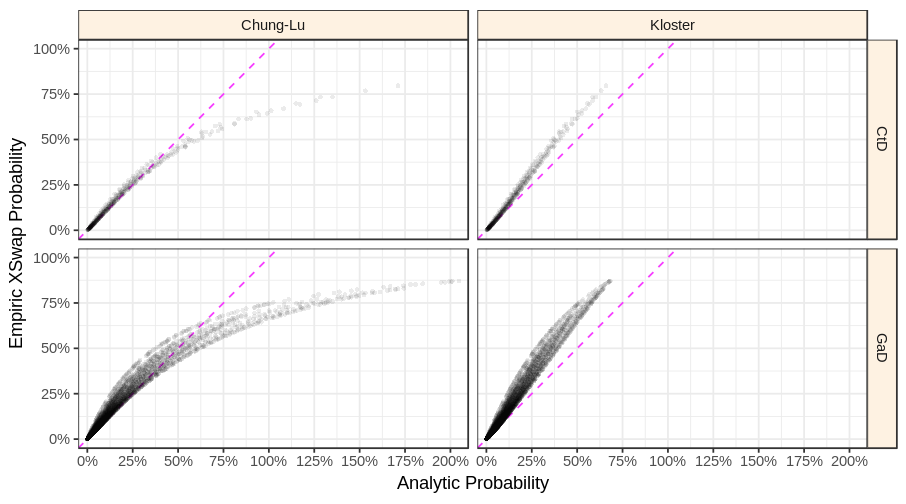

In [8]:
width = 7.55
height = 4.2
options(repr.plot.width=width, repr.plot.height=height)
gg_scatter = long_df %>%
  dplyr::filter(method != 'Lizee') %>%
  dplyr::mutate(method = factor(method, levels=c('Lizee', 'Chung-Lu', 'Kloster'))) %>%
  ggplot2::ggplot(ggplot2::aes(prior, xswap_prior)) +
  ggplot2::geom_abline(slope=1, color='#f63dff', linetype='dashed') +
  ggplot2::geom_point(alpha = 0.08, shape = 16, size=1) +
#   ggplot2::geom_linerange(ggplot2::aes(
#     ymin=boot::logit(xswap_prior - 2*prior_perm_stderr),
#     ymax=boot::logit(xswap_prior + 2*prior_perm_stderr)
#   )) +
  ggplot2::theme_bw() +
  ggplot2::coord_fixed() +
  ggplot2::facet_grid(metaedge ~ method) +
  ggplot2::xlab('Analytic Probability') +
  ggplot2::ylab('Empiric XSwap Probability') +
  ggplot2::scale_x_continuous(labels = scales::percent, breaks=seq(0,5,0.25), expand=c(0, 0.05)) +
  ggplot2::scale_y_continuous(labels = scales::percent, limits=c(0, 1), expand=c(0, 0.05)) + 
  ggplot2::theme(strip.background  = ggplot2::element_rect(fill = '#fef2e2'))


gg_scatter
ggplot2::ggsave('xswap-versus-analytic-priors.png', gg_scatter, dpi = 300, width = width, height = height)

In [9]:
# Top 10 degree-pairs with the highest XSwap prior
degree_prior_df %>%
  dplyr::group_by(metaedge) %>%
  dplyr::arrange(desc(xswap_prior)) %>%
  dplyr::do(head(., 10))

source_degree,target_degree,xswap_prior,prior_perm_stderr,n_edges,n_possible,metaedge,logit_xswap_prior,Lizee,Chung-Lu,Kloster
19,68,0.795997,0.000466878,1,1,CtD,1.3614607,0.04335716,1.7112583,0.6588475
17,68,0.768551,0.000488645,0,1,CtD,1.2001474,0.03879325,1.5311258,0.6327313
15,68,0.734184,0.000511826,1,1,CtD,1.0159553,0.03422934,1.3509934,0.6024808
19,51,0.733662,0.000512146,0,1,CtD,1.0132823,0.03251787,1.2834437,0.5854985
14,68,0.714649,0.000523197,0,1,CtD,0.9180715,0.03194738,1.2609272,0.5854859
17,51,0.698313,0.000531781,0,1,CtD,0.8392774,0.02909494,1.1483444,0.5575563
13,68,0.693760,0.000534029,1,1,CtD,0.8177570,0.02966543,1.1708609,0.5670301
12,68,0.669943,0.000544807,1,1,CtD,0.7079273,0.02738347,1.0807947,0.5469169
15,51,0.659217,0.000549139,1,1,CtD,0.6598069,0.02567200,1.0132450,0.5257732
19,37,0.652270,0.000551778,1,1,CtD,0.6290323,0.02359140,0.9311258,0.5010691


In [10]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /home/dhimmel/anaconda3/envs/r35/lib/R/lib/libRblas.so
LAPACK: /home/dhimmel/anaconda3/envs/r35/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     plyr_1.8.4       pillar_1.3.0     compiler_3.4.1  
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      boot_1.3-19     
 [9] digest_0.6.16    uuid_0.1-2       jsonlite_1